In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sns

In [2]:
df=datasets.load_iris()

In [3]:
data=pd.DataFrame(df.data,columns=df.feature_names)
data['Class']=df.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
data['Class'].isnull().sum()

0

<Figure size 144x288 with 0 Axes>

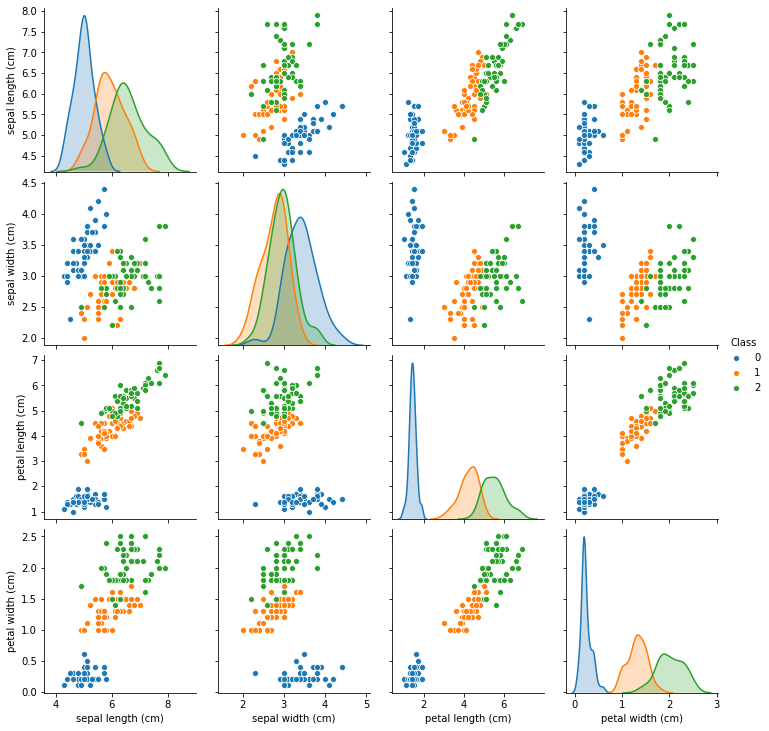

In [8]:
plt.figure(figsize=(2,4))
sns.pairplot(data,hue='Class')

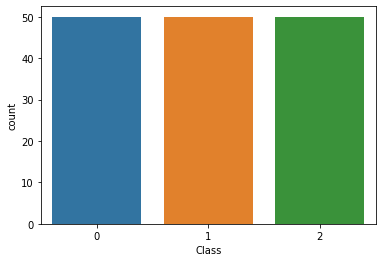

In [9]:
sns.countplot(data['Class'])

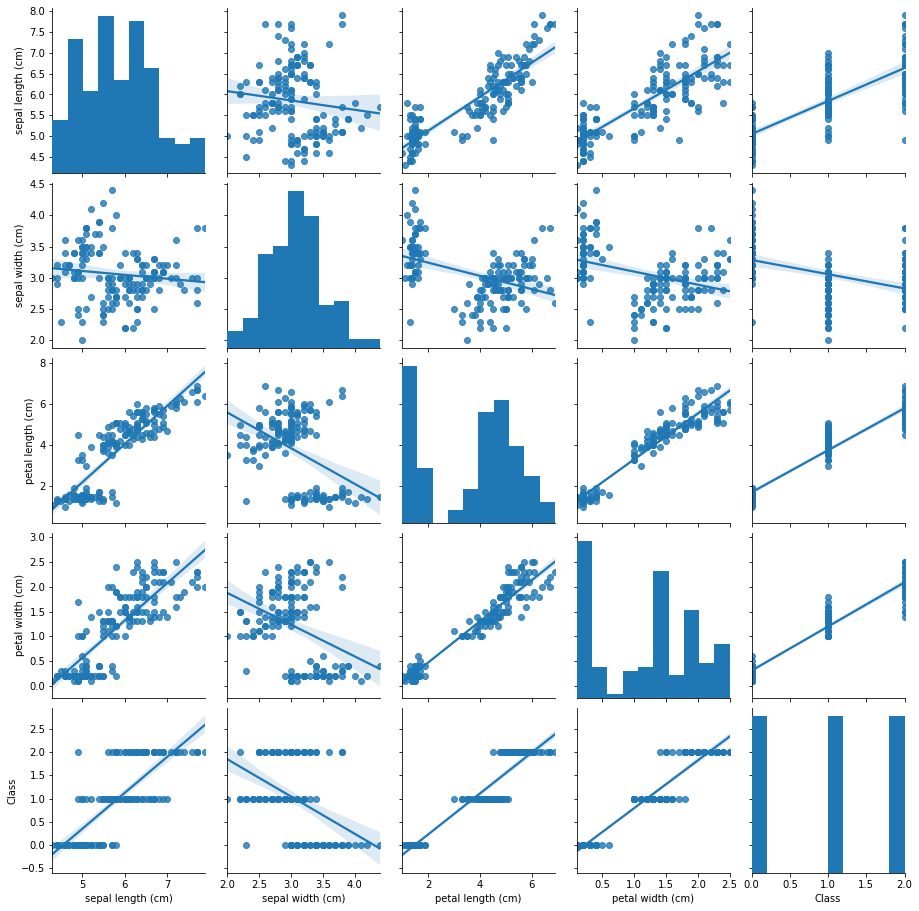

In [10]:
sns.pairplot(data,kind='reg')

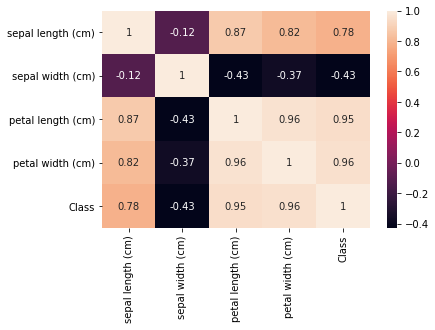

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
x=df.data
y=df.target

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [33]:
dsc=DecisionTreeClassifier('gini')
model=dsc.fit(x,y)

/home/ali/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass criterion=gini as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [34]:
#check the prediction and evaluation 

In [43]:
score=model.predict(x)
print("Accuracy_scores : ",accuracy_score(y,score)*100)

Accuracy_scores :  100.0


In [45]:
print(classification_report(y,score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



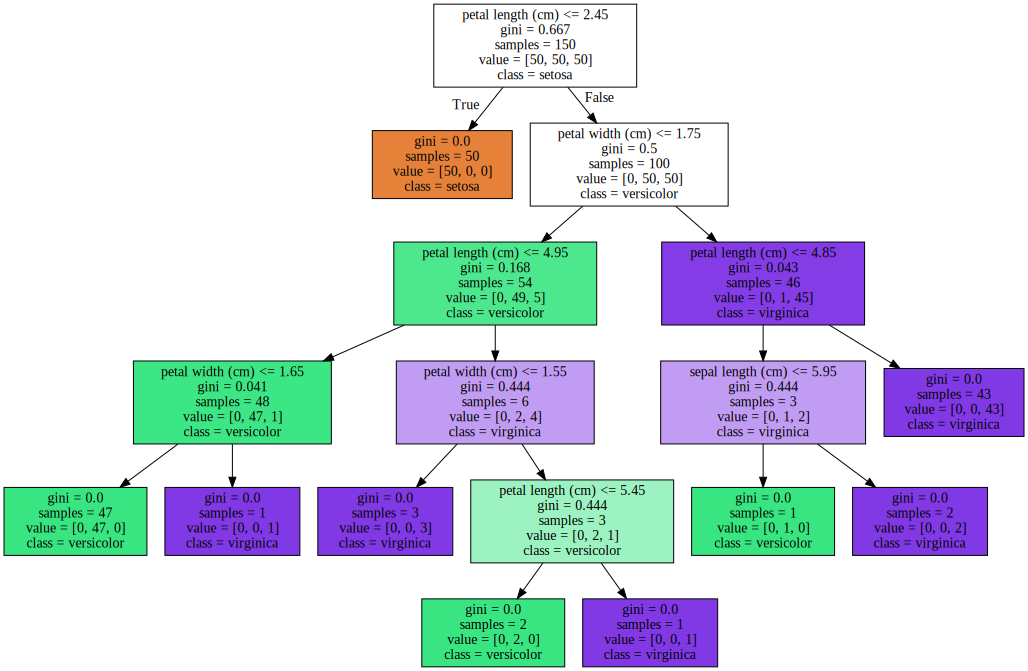

In [42]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=df.feature_names,  
                                class_names=df.target_names,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph